# Please note that Isles of Scilly is deleted as outliers.

In [114]:
data_filename = "CW1.csv"
output_filename = "correlation matrix.png"

In [115]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Preperation

In [120]:
conditionx = pd.read_csv('CW1_correlation.csv')

In [121]:
conditionx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   2008_2013_ratio   152 non-null    float64
 1   2013_2018_ratio   152 non-null    float64
 2   2008_2018_ratio   152 non-null    float64
 3   total_budget      152 non-null    int64  
 4   clean_air         152 non-null    int64  
 5   clean_environ     152 non-null    int64  
 6   health_training   152 non-null    int64  
 7   school_awareness  152 non-null    int64  
 8   media_awareness   152 non-null    int64  
 9   sub_counselling   152 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 12.0 KB


In [122]:
conditionx.head()

,2008_2013_ratio,2013_2018_ratio,2008_2018_ratio,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,0.0068,0.2140,0.2223,139000,21000,22000,18000,41000,18000,19000
1,0.0904,0.2579,0.3716,220000,50000,17000,23000,74000,30000,26000
2,0.1642,0.1057,0.2872,160000,41000,45000,5000,26000,29000,14000
3,-0.0466,0.0720,0.0221,161000,33000,42000,19000,50000,10000,7000
4,0.0092,0.0851,0.0951,130000,37000,52000,17000,8000,3000,13000


# Check the correlation between variables

Text(0.5, 1.0, 'Correlation Matrix')

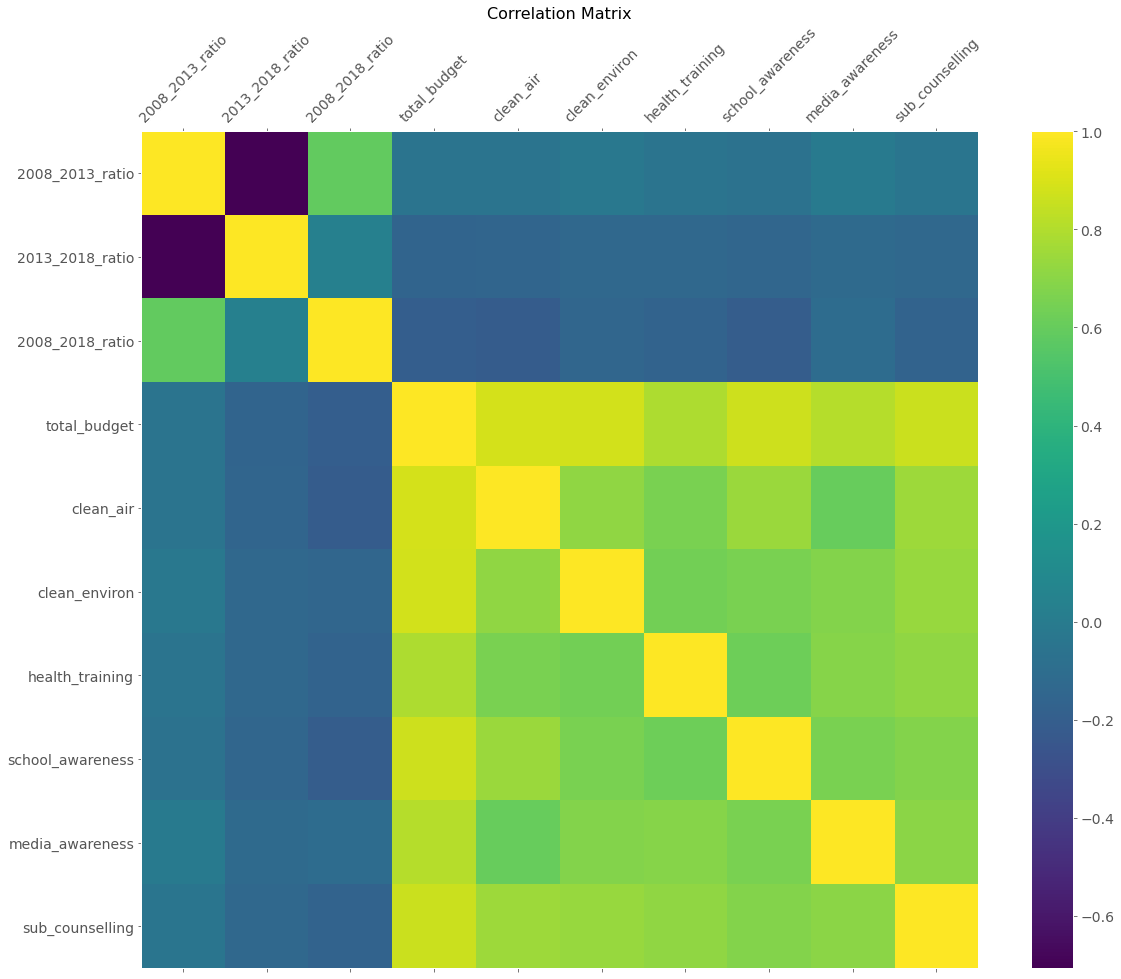

In [123]:
df = conditionx
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [124]:
df.corr() # pandas' function

,2008_2013_ratio,2013_2018_ratio,2008_2018_ratio,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
2008_2013_ratio,1.0000,-0.7070,0.5894,-0.0493,-0.0509,-0.0265,-0.0498,-0.0642,-0.0133,-0.0460
2013_2018_ratio,-0.7070,1.0000,0.0334,-0.1563,-0.1511,-0.1274,-0.1285,-0.1424,-0.1149,-0.1314
2008_2018_ratio,0.5894,0.0334,1.0000,-0.1957,-0.2093,-0.1413,-0.1618,-0.2006,-0.1044,-0.1641
total_budget,-0.0493,-0.1563,-0.1957,1.0000,0.8900,0.8855,0.7932,0.8713,0.8107,0.8611
clean_air,-0.0509,-0.1511,-0.2093,0.8900,1.0000,0.7162,0.6574,0.7432,0.6026,0.7514
clean_environ,-0.0265,-0.1274,-0.1413,0.8855,0.7162,1.0000,0.6383,0.6557,0.6800,0.7353
health_training,-0.0498,-0.1285,-0.1618,0.7932,0.6574,0.6383,1.0000,0.6206,0.6894,0.7151
school_awareness,-0.0642,-0.1424,-0.2006,0.8713,0.7432,0.6557,0.6206,1.0000,0.6584,0.6865
media_awareness,-0.0133,-0.1149,-0.1044,0.8107,0.6026,0.6800,0.6894,0.6584,1.0000,0.7035
sub_counselling,-0.0460,-0.1314,-0.1641,0.8611,0.7514,0.7353,0.7151,0.6865,0.7035,1.0000


# Linear Regression

In [125]:
data_filename = 'CW1.csv'
output_filename = 'regression.png'

In [126]:
figure_width, figure_height = 7,7

import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

## 2008-2013

In [127]:
x_values = data[1:,4]
y_values = data[1:,1]

In [128]:
x_values

array([ 139000.,  220000.,  160000.,  161000.,  130000.,  199000.,
        831000.,   91000.,   99000.,  201000.,  130000.,   90000.,
        449000.,  239000.,  230000.,  370000.,  290000.,  349000.,
        141000.,  149000.,  551000.,  180000.,  180000.,  299000.,
        281000.,   50000.,  411000.,  240000.,  230000.,  340000.,
         79000.,  189000.,  580000.,  580000.,  200000.,  310000.,
        260000.,  411000.,  250000.,  269000.,  449000.,  249000.,
       1070000.,  131000.,  459000.,  179000.,  169000.,   99000.,
        121000., 1120000.,  181000.,  191000.,   89000.,  211000.,
        120000.,  890000.,  209000.,  190000.,  120000.,    2000.,
        140000.,  130000., 1170000.,  200000.,  139000.,  330000.,
        120000.,  260000.,  800000.,  550000.,  241000.,  459000.,
        180000.,  491000.,  310000.,  140000.,  439000.,  190000.,
        160000.,  101000.,  210000.,  220000.,  200000.,  619000.,
        110000.,  141000.,  160000.,  150000.,  489000.,  5900

In [129]:
y_values

array([ 0.00684413,  0.09042343,  0.16418846, -0.04659779,  0.00919946,
        0.08082503,  0.06972813,  0.029347  , -0.00455138,  0.10224925,
       -0.02070659,  0.10512784,  0.04845161,  0.0731921 , -0.02126414,
        0.02373063,  0.16287315,  0.01174331, -0.02537928, -0.00746292,
       -0.03953775,  0.05289488,  0.09533164,  0.04389912,  0.03924023,
        0.0119689 ,  0.02522284,  0.08699924,  0.10748413,  0.03133303,
        0.06213049,  0.01201534,  0.02525365, -0.0067044 ,  0.05218685,
        0.04506169,  0.03193379,  0.07060674,  0.08263702,  0.04453669,
        0.01712174,  0.09131187, -0.0015586 ,  0.06188115,  0.03310877,
        0.15932119,  0.06526692,  0.04183441,  0.03215851,  0.01839391,
        0.15847008,  0.07859846,  0.0389443 ,  0.02694249, -0.0082056 ,
        0.02918947,  0.17601302,  0.08234428,  0.04766338, -0.81551363,
        0.06700472,  0.07939602,  0.01908075,  0.04454435,  0.0228577 ,
        0.07345634,  0.1227409 ,  0.04592605,  0.02134509,  0.09

In [130]:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()

print(regression_model_b.summary())
print()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3651
Date:                Sun, 14 Nov 2021   Prob (F-statistic):              0.547
Time:                        14:12:45   Log-Likelihood:                 153.23
No. Observations:                 152   AIC:                            -302.5
Df Residuals:                     150   BIC:                            -296.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0490      0.012      4.169      0.0

In [131]:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

In [132]:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = -2.0765754996277658e-08
intercept = 0.04902622061534252
Rsquared  = 0.0024278240544691743
MSE       = 0.00790050308596788
pvalue    = 0.5466221836683423


In [133]:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

In [134]:
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

(0.0, 5000000.0)

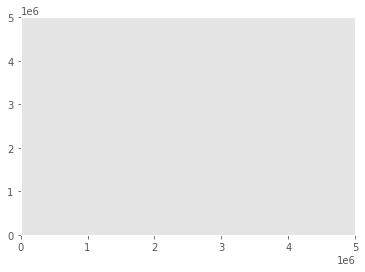

In [135]:
x_min,x_max = 0,5000000
y_min,y_max = 0,5000000
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

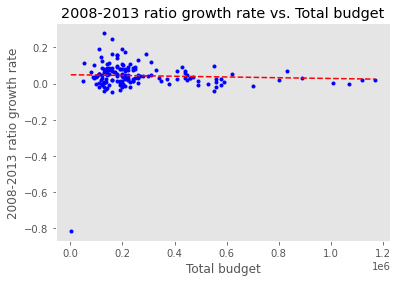

In [138]:
output_filename = '0813_regression_original.png'
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')

plt.xlabel('Total budget')
plt.ylabel('2008-2013 ratio growth rate')
plt.title('2008-2013 ratio growth rate vs. Total budget')

plt.savefig(output_filename)

### Residual Analysis

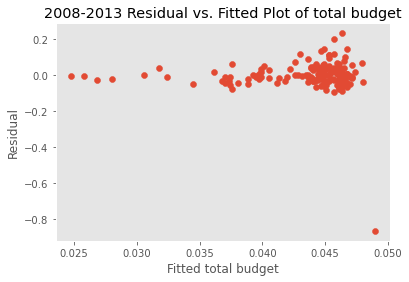

In [139]:
# plot 
plt.scatter(regression_model_b.fittedvalues, regression_model_b.resid)
# adding title and labels
plt.xlabel('Fitted total budget')
plt.ylabel('Residual')
plt.title('2008-2013 Residual vs. Fitted Plot of total budget')
plt.show()

## 2013-2018

In [140]:
x_values = data[1:,4]
y2_values = data[1:,2]

In [141]:
X_values = sms.add_constant(x_values)
regression_model_a2 = sms.OLS(y2_values, X_values)
regression_model_b2 = regression_model_a2.fit()

print(regression_model_b2.summary())
print() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.754
Date:                Sun, 14 Nov 2021   Prob (F-statistic):             0.0546
Time:                        14:15:15   Log-Likelihood:                0.55367
No. Observations:                 152   AIC:                             2.893
Df Residuals:                     150   BIC:                             8.940
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1531      0.032      4.767      0.0

In [142]:
gradient2  = regression_model_b2.params[1]
intercept2 = regression_model_b2.params[0]
Rsquared2  = regression_model_b2.rsquared
MSE2       = regression_model_b2.mse_resid
pvalue2    = regression_model_b2.f_pvalue

In [143]:
print("gradient  =", regression_model_b2.params[1])
print("intercept =", regression_model_b2.params[0])
print("Rsquared  =", regression_model_b2.rsquared)
print("MSE       =", regression_model_b2.mse_resid)
print("pvalue    =", regression_model_b2.f_pvalue)

gradient  = -1.8182736418601182e-07
intercept = 0.15305249104809654
Rsquared  = 0.024417465072032685
MSE       = 0.05889983881022604
pvalue    = 0.05455082453786073


In [144]:
x_lobf2 = [min(x_values),max(x_values)]
y_lobf2 = [x_lobf2[0]*gradient2 + intercept2,x_lobf2[1]*gradient2 + intercept2]

In [145]:
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

(0.0, 5000000.0)

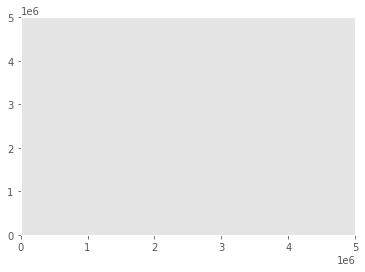

In [146]:
x_min,x_max = 0,5000000
y_min,y_max = 0,5000000
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

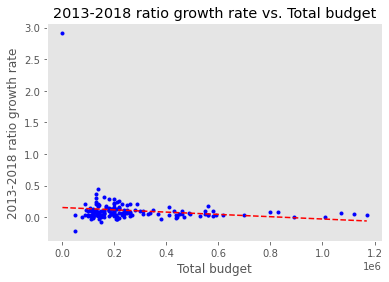

In [147]:
output_filename2 = 'regression_1318_original.png'
plt.plot(x_values,y2_values,'b.',x_lobf2,y_lobf2,'r--')

plt.xlabel('Total budget')
plt.ylabel('2013-2018 ratio growth rate')
plt.title('2013-2018 ratio growth rate vs. Total budget')

plt.savefig(output_filename2)

### Residual Analysis

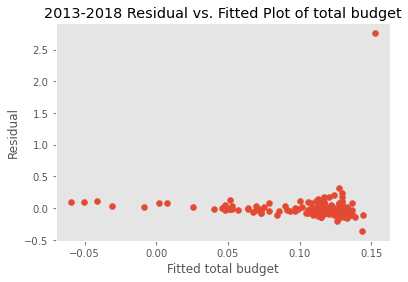

In [148]:
# plot 
plt.scatter(regression_model_b2.fittedvalues, regression_model_b2.resid)
# adding title and labels
plt.xlabel('Fitted total budget')
plt.ylabel('Residual')
plt.title('2013-2018 Residual vs. Fitted Plot of total budget')
plt.show()

## 2008-2018

In [149]:
x_values = data[1:,4]
y3_values = data[1:,3]

In [150]:
X_values = sms.add_constant(x_values)
regression_model_a3 = sms.OLS(y3_values, X_values)
regression_model_b3 = regression_model_a2.fit()

print(regression_model_b3.summary())
print() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.754
Date:                Sun, 14 Nov 2021   Prob (F-statistic):             0.0546
Time:                        14:16:47   Log-Likelihood:                0.55367
No. Observations:                 152   AIC:                             2.893
Df Residuals:                     150   BIC:                             8.940
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1531      0.032      4.767      0.0

In [151]:
gradient3  = regression_model_b3.params[1]
intercept3 = regression_model_b3.params[0]
Rsquared3  = regression_model_b3.rsquared
MSE3       = regression_model_b3.mse_resid
pvalue3    = regression_model_b3.f_pvalue

In [152]:
print("gradient  =", regression_model_b3.params[1])
print("intercept =", regression_model_b3.params[0])
print("Rsquared  =", regression_model_b3.rsquared)
print("MSE       =", regression_model_b3.mse_resid)
print("pvalue    =", regression_model_b3.f_pvalue)

gradient  = -1.8182736418601182e-07
intercept = 0.15305249104809654
Rsquared  = 0.024417465072032685
MSE       = 0.05889983881022604
pvalue    = 0.05455082453786073


In [153]:
x_lobf3 = [min(x_values),max(x_values)]
y_lobf3 = [x_lobf3[0]*gradient3 + intercept3,x_lobf3[1]*gradient3 + intercept3]

In [154]:
plt.figure(figsize=(figure_width,figure_height))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

(0.0, 5000000.0)

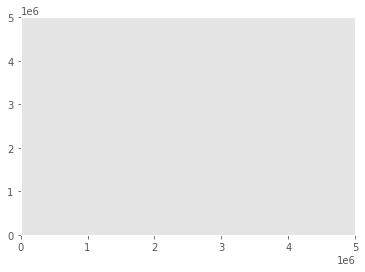

In [155]:
x_min,x_max = 0,5000000
y_min,y_max = 0,5000000
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

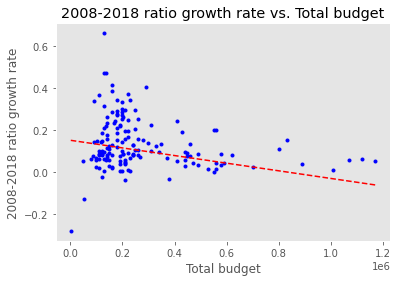

In [156]:
output_filename3 = 'regression_0818_original.png'
plt.plot(x_values,y3_values,'b.',x_lobf3,y_lobf3,'r--')

plt.xlabel('Total budget')
plt.ylabel('2008-2018 ratio growth rate')
plt.title('2008-2018 ratio growth rate vs. Total budget')

plt.savefig(output_filename3)

### Residual Analysis

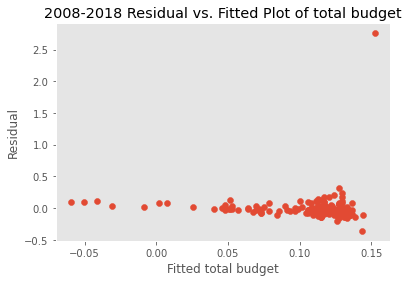

In [157]:
# plot 
plt.scatter(regression_model_b3.fittedvalues, regression_model_b3.resid)
# adding title and labels
plt.xlabel('Fitted total budget')
plt.ylabel('Residual')
plt.title('2008-2018 Residual vs. Fitted Plot of total budget')
plt.show()